In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

df = pd.read_csv("fifa_datasetSM.csv")

# two numerical features (used for visualization)
features = ['ATT_ATT_diff', 'DEF_DEF_diff']
data = df[features].dropna()

scaler = StandardScaler()
X = scaler.fit_transform(data)


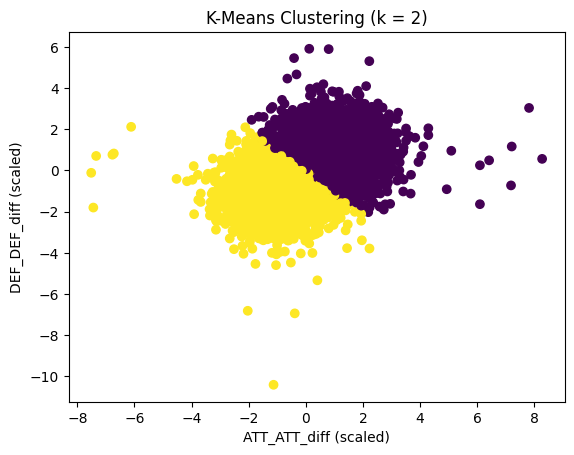

In [2]:
#K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels)
plt.xlabel('ATT_ATT_diff (scaled)')
plt.ylabel('DEF_DEF_diff (scaled)')
plt.title('K-Means Clustering (k = 2)')
plt.show()


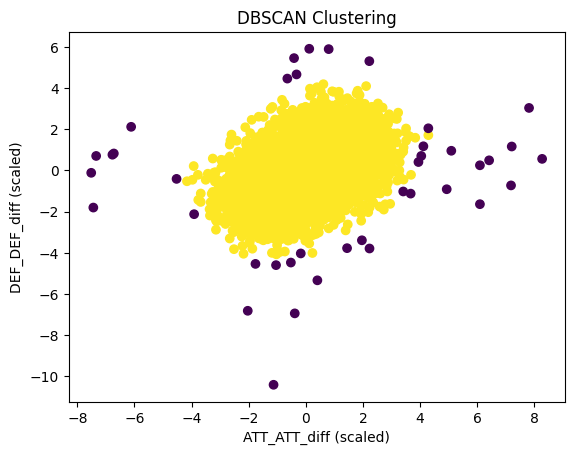

Number of clusters found: 1
Number of noise points: 40


In [3]:
#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

#Visualization
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels)
plt.xlabel('ATT_ATT_diff (scaled)')
plt.ylabel('DEF_DEF_diff (scaled)')
plt.title('DBSCAN Clustering')
plt.show()

#Cluster statistics
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("Number of clusters found:", n_clusters)
print("Number of noise points:", n_noise)


Analysis and Comparison

Cluster Shape and Structure :-
K-Means forms compact, spherical clusters and forces all points into a cluster.
DBSCAN finds clusters of arbitrary shape and does not require predefining the number of clusters.

Sensitivity to Noise and Outliers :-
K-Means is sensitive to outliers since centroids shift.
DBSCAN explicitly identifies outliers as noise (label = -1).

Suitability for This Dataset:-
K-Means is suitable when match performance differences are evenly distributed.
DBSCAN is more appropriate when the dataset contains irregular patterns or extreme matches that should not belong to any cluster.